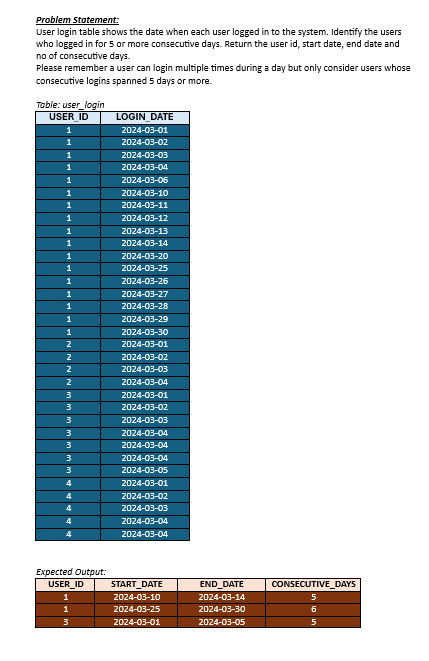

In [8]:
import pandas as pd
from datetime import datetime

# List of user logins extracted from the SQL-like insert statements
user_logins = [
    (1, '01/03/2024'), (1, '02/03/2024'), (1, '03/03/2024'), (1, '04/03/2024'), 
    (1, '06/03/2024'), (1, '10/03/2024'), (1, '11/03/2024'), (1, '12/03/2024'), 
    (1, '13/03/2024'), (1, '14/03/2024'), (1, '20/03/2024'), (1, '25/03/2024'), 
    (1, '26/03/2024'), (1, '27/03/2024'), (1, '28/03/2024'), (1, '29/03/2024'), 
    (1, '30/03/2024'), (2, '01/03/2024'), (2, '02/03/2024'), (2, '03/03/2024'), 
    (2, '04/03/2024'), (3, '01/03/2024'), (3, '02/03/2024'), (3, '03/03/2024'), 
    (3, '04/03/2024'), (3, '05/03/2024'), (4, '01/03/2024'), (4, '02/03/2024'), 
    (4, '03/03/2024'), (4, '04/03/2024')
]

# Convert list into DataFrame
df = pd.DataFrame(user_logins, columns=['user_id', 'login_date'])

# Convert login_date to datetime format
df['login_date'] = pd.to_datetime(df['login_date'], format='%d/%m/%Y')

df = df.drop_duplicates(subset=['user_id', 'login_date'])
# Sort the data by user and login date
df = df.sort_values(by=['user_id', 'login_date'])

# Print the DataFrame
print(df)
# Identify consecutive login days
df['day_diff'] = df.groupby('user_id')['login_date'].diff().dt.days.fillna(0)

    user_id login_date
0         1 2024-03-01
1         1 2024-03-02
2         1 2024-03-03
3         1 2024-03-04
4         1 2024-03-06
5         1 2024-03-10
6         1 2024-03-11
7         1 2024-03-12
8         1 2024-03-13
9         1 2024-03-14
10        1 2024-03-20
11        1 2024-03-25
12        1 2024-03-26
13        1 2024-03-27
14        1 2024-03-28
15        1 2024-03-29
16        1 2024-03-30
17        2 2024-03-01
18        2 2024-03-02
19        2 2024-03-03
20        2 2024-03-04
21        3 2024-03-01
22        3 2024-03-02
23        3 2024-03-03
24        3 2024-03-04
25        3 2024-03-05
26        4 2024-03-01
27        4 2024-03-02
28        4 2024-03-03
29        4 2024-03-04


In [9]:
# Create a 'consecutive_group' by comparing the day difference with 1
df['consecutive_group'] = (df['day_diff'] != 1).cumsum()
df

,user_id,login_date,day_diff,consecutive_group
0,1,2024-03-01,0.0,1
1,1,2024-03-02,1.0,1
2,1,2024-03-03,1.0,1
3,1,2024-03-04,1.0,1
4,1,2024-03-06,2.0,2
5,1,2024-03-10,4.0,3
6,1,2024-03-11,1.0,3
7,1,2024-03-12,1.0,3
8,1,2024-03-13,1.0,3
9,1,2024-03-14,1.0,3


In [10]:
# Function to identify and extract sequences of 5 or more consecutive days
result = df.groupby(['user_id', 'consecutive_group']).agg(
    start_date=('login_date', 'min'),
    end_date=('login_date', 'max'),
    consecutive_days=('login_date', 'count')
).reset_index()

result

,user_id,consecutive_group,start_date,end_date,consecutive_days
0,1,1,2024-03-01,2024-03-04,4
1,1,2,2024-03-06,2024-03-06,1
2,1,3,2024-03-10,2024-03-14,5
3,1,4,2024-03-20,2024-03-20,1
4,1,5,2024-03-25,2024-03-30,6
5,2,6,2024-03-01,2024-03-04,4
6,3,7,2024-03-01,2024-03-05,5
7,4,8,2024-03-01,2024-03-04,4


In [12]:
result = result[result['consecutive_days'] >= 5]
print(result)


   user_id  consecutive_group start_date   end_date  consecutive_days
2        1                  3 2024-03-10 2024-03-14                 5
4        1                  5 2024-03-25 2024-03-30                 6
6        3                  7 2024-03-01 2024-03-05                 5
